In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
trn_num = 12000
tst_num = 1200

In [3]:
import glob

In [71]:
# select train and test pixels
trn_Xids = sorted(glob.glob('./data/block1/train/X/*.npy') + glob.glob('./data/block2/train/X/*.npy') + glob.glob('./data/block3/train/X/*.npy') + glob.glob('./data/block4/train/X/*.npy'))
trn_Yids = sorted(glob.glob('./data/block1/train/Y/*.npy') + glob.glob('./data/block2/train/Y/*.npy') + glob.glob('./data/block3/train/Y/*.npy') + glob.glob('./data/block4/train/Y/*.npy'))
tst_Xids = sorted(glob.glob('./data/block1/test/X/*.npy') + glob.glob('./data/block2/test/X/*.npy') + glob.glob('./data/block3/test/X/*.npy') + glob.glob('./data/block4/test/X/*.npy'))
tst_Yids = sorted(glob.glob('./data/block1/test/Y/*.npy') + glob.glob('./data/block2/test/Y/*.npy') + glob.glob('./data/block3/test/Y/*.npy') + glob.glob('./data/block4/test/Y/*.npy'))

In [110]:
from src.DeepRock.utils import get_data

#### random forest classifier

In [112]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

In [141]:
trn_X, trn_Y = get_data(trn_Xids, trn_Yids, trn_num)
tst_X, tst_Y = get_data(tst_Xids, tst_Yids, tst_num)

In [142]:
clf.fit(trn_X, trn_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [143]:
preds = clf.predict(tst_X)

In [144]:
clf.score(tst_X, tst_Y)

0.6108333333333333

In [145]:
from sklearn import metrics

In [146]:
cm = metrics.confusion_matrix(tst_Y, preds)

In [147]:
from src.DeepRock.utils import plot_confusion_matrix

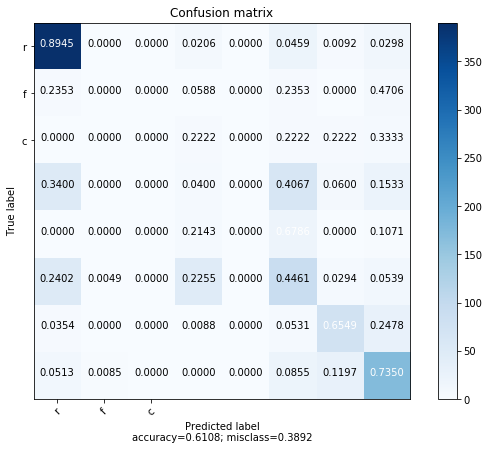

In [152]:
plot_confusion_matrix(cm, target_names='rfc', normalize=True)